In [72]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import pickle
import scipy



In [23]:
(training_images, training_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [24]:
training_images, test_images = training_images / 255.0, test_images / 255.0

In [25]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64,(3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64,(3,3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

In [26]:
history = model1.fit(training_images,training_labels,epochs=50,validation_data=(test_images,test_labels))

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5081 - accuracy: 0.4494 - val_loss: 1.2318 - val_accuracy: 0.5612
Epoch 2/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1411 - accuracy: 0.5945 - val_loss: 1.0805 - val_accuracy: 0.6207
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9983 - accuracy: 0.6496 - val_loss: 0.9433 - val_accuracy: 0.6689
Epoch 4/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8996 - accuracy: 0.6857 - val_loss: 0.9153 - val_accuracy: 0.6820
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8205 - accuracy: 0.7122 - val_loss: 0.9455 - val_accuracy: 0.6716
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7631 - accuracy: 0.7325 - val_loss: 0.9150 - val_accuracy: 0.6853
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7158 - accuracy: 0.7499 - val_loss: 0.8484 - val_ac

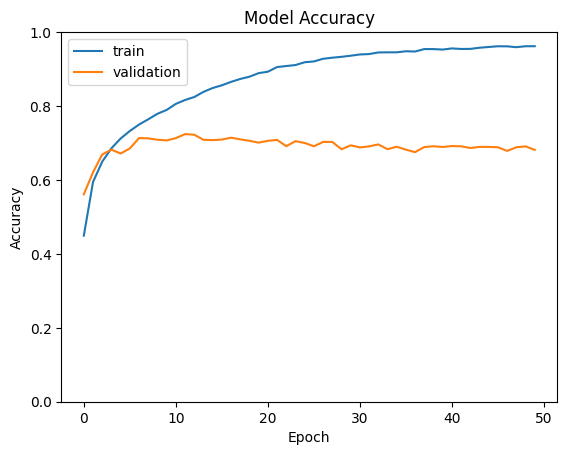

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.legend(['train','validation'])
plt.show()

In [27]:
with open('trained_models/model_shallow.pkl', 'wb') as f:
    pickle.dump(model1, f)

INFO:tensorflow:Assets written to: ram://a6be0f60-b260-4fc7-a270-b02d4ceaba2d/assets


INFO:tensorflow:Assets written to: ram://a6be0f60-b260-4fc7-a270-b02d4ceaba2d/assets


In [13]:
from tensorflow.keras import layers, models

model = models.Sequential()

# First convolutional block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Second convolutional block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Third convolutional block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))

# Fourth convolutional block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Flattening and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 6, 6, 64)         

In [14]:
history1 = model.fit(training_images,training_labels,epochs=50,validation_data=(test_images,test_labels))

Epoch 1/50
1563/1563 [==============================] - 17s 10ms/step - loss: 1.7476 - accuracy: 0.3481 - val_loss: 1.3782 - val_accuracy: 0.4942
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3818 - accuracy: 0.5049 - val_loss: 1.1891 - val_accuracy: 0.5731
Epoch 3/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.2608 - accuracy: 0.5555 - val_loss: 1.0957 - val_accuracy: 0.6155
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1813 - accuracy: 0.5862 - val_loss: 1.0259 - val_accuracy: 0.6402
Epoch 5/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1277 - accuracy: 0.6058 - val_loss: 0.9992 - val_accuracy: 0.6538
Epoch 6/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0822 - accuracy: 0.6239 - val_loss: 0.9564 - val_accuracy: 0.6626
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0548 - accuracy: 0.6354 - val_loss: 0.9513 - v

In [21]:
with open('trained_models/model_deep.pkl', 'wb') as f:
    pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://9bfcf474-24b4-4409-addd-8970e69bda89/assets


INFO:tensorflow:Assets written to: ram://9bfcf474-24b4-4409-addd-8970e69bda89/assets


In [ ]:
model.save('deep_model.h5')

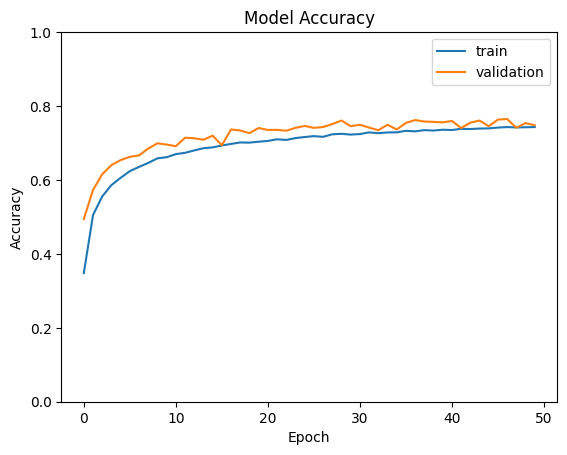

In [70]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.legend(['train','validation'])
plt.show()

In [73]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Activation, Dropout
import matplotlib.pyplot as plt

In [74]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [75]:
# Network
def create_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding = 'same', input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))

    # Adding more layers to improve the model
    model.add(Conv2D(32, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size= (2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size= (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [76]:
BATCH_SIZE = 128
nb_epochs = 40
VALIDATION_SPLIT = 0.2
num_classes = 10


In [77]:
num_train, img_channels, img_rows, img_cols = X_train.shape
num_test, _, _, _= X_test.shape

In [78]:
print('X_train Shape:', X_train.shape)
training_samples = X_train.shape[0]
print("Training samples:", training_samples)
print("Test Samples:", y_test.shape[0])

X_train Shape: (50000, 32, 32, 3)
Training samples: 50000
Test Samples: 10000


In [79]:
class_names =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [80]:
# convert to categorical
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [81]:
#float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [82]:

datagen = ImageDataGenerator(zoom_range = 0.2,
                            horizontal_flip = True)
datagen.fit(X_train)

In [83]:
model_aug = create_cnn_model()
model_aug.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [63]:

# import h5py as h5py

In [64]:
# lr = 0.01
# def learning_rate_decay(epoch):
#     return lr * (0.1 ** int(epoch / 10)) 

In [84]:
history2 = model_aug.fit(datagen.flow(X_train, y_train,batch_size = BATCH_SIZE),steps_per_epoch = X_train.shape[0] / BATCH_SIZE, 
                                        epochs = nb_epochs, verbose = 1,validation_data = (X_test, y_test),              
                                        callbacks = [ModelCheckpoint('model_aug.h5', save_best_only =True),
                                        EarlyStopping(monitor='val_accuracy', min_delta=0.000001, patience=10, 
                                        verbose=1, mode='auto')])
                                        
                                                     
                                                     

Epoch 1/40
390/390 [==============================] - 27s 67ms/step - loss: 1.7026 - accuracy: 0.3766 - val_loss: 1.3985 - val_accuracy: 0.4913
Epoch 2/40
390/390 [==============================] - 25s 64ms/step - loss: 1.3366 - accuracy: 0.5216 - val_loss: 1.1219 - val_accuracy: 0.6007
Epoch 3/40
390/390 [==============================] - 25s 64ms/step - loss: 1.1462 - accuracy: 0.5936 - val_loss: 0.9732 - val_accuracy: 0.6557
Epoch 4/40
309/390 [======================>.......] - ETA: 5s - loss: 1.0443 - accuracy: 0.6330

KeyboardInterrupt: 